In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [2]:
df = pd.read_csv("global_energy_consumption.csv")

In [3]:
df.head()

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
0,Canada,2018,9525.38,42301.43,13.70,70.47,45.18,19.96,3766.11,0.12
1,Germany,2020,7922.08,36601.38,33.63,41.95,34.32,22.27,2713.12,0.08
2,Russia,2002,6630.01,41670.20,10.82,39.32,53.66,26.44,885.98,0.26
3,Brazil,2010,8580.19,10969.58,73.24,16.71,30.55,27.60,1144.11,0.47
4,Canada,2006,848.88,32190.85,73.60,74.86,42.39,23.43,842.39,0.48


In [4]:
df.tail()

,Country,Year,Total Energy Consumption (TWh),Per Capita Energy Use (kWh),Renewable Energy Share (%),Fossil Fuel Dependency (%),Industrial Energy Use (%),Household Energy Use (%),Carbon Emissions (Million Tons),Energy Price Index (USD/kWh)
9995,Canada,2017,9786.50,30481.07,14.87,70.25,53.93,19.94,620.85,0.29
9996,UK,2011,7200.88,37402.75,89.00,16.55,24.35,20.57,830.73,0.48
9997,India,2011,2579.82,44516.91,46.65,68.06,57.01,33.73,993.78,0.08
9998,UK,2020,5950.39,22289.39,43.43,68.57,34.94,25.40,199.85,0.47
9999,Brazil,2018,5387.71,17454.75,89.62,49.97,30.04,37.96,4606.33,0.11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          10000 non-null  object 
 1   Year                             10000 non-null  int64  
 2   Total Energy Consumption (TWh)   10000 non-null  float64
 3   Per Capita Energy Use (kWh)      10000 non-null  float64
 4   Renewable Energy Share (%)       10000 non-null  float64
 5   Fossil Fuel Dependency (%)       10000 non-null  float64
 6   Industrial Energy Use (%)        10000 non-null  float64
 7   Household Energy Use (%)         10000 non-null  float64
 8   Carbon Emissions (Million Tons)  10000 non-null  float64
 9   Energy Price Index (USD/kWh)     10000 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 781.4+ KB


In [6]:
df.describe

<bound method NDFrame.describe of       Country  Year  Total Energy Consumption (TWh)  \
0      Canada  2018                         9525.38   
1     Germany  2020                         7922.08   
2      Russia  2002                         6630.01   
3      Brazil  2010                         8580.19   
4      Canada  2006                          848.88   
...       ...   ...                             ...   
9995   Canada  2017                         9786.50   
9996       UK  2011                         7200.88   
9997    India  2011                         2579.82   
9998       UK  2020                         5950.39   
9999   Brazil  2018                         5387.71   

      Per Capita Energy Use (kWh)  Renewable Energy Share (%)  \
0                        42301.43                       13.70   
1                        36601.38                       33.63   
2                        41670.20                       10.82   
3                        10969.58            

In [7]:
# Aggregate global energy consumption per year
global_trends = df.groupby("Year").agg({
    "Total Energy Consumption (TWh)": "sum",
    "Renewable Energy Share (%)": "mean",
    "Fossil Fuel Dependency (%)": "mean",
    "Carbon Emissions (Million Tons)": "sum"
}).reset_index()

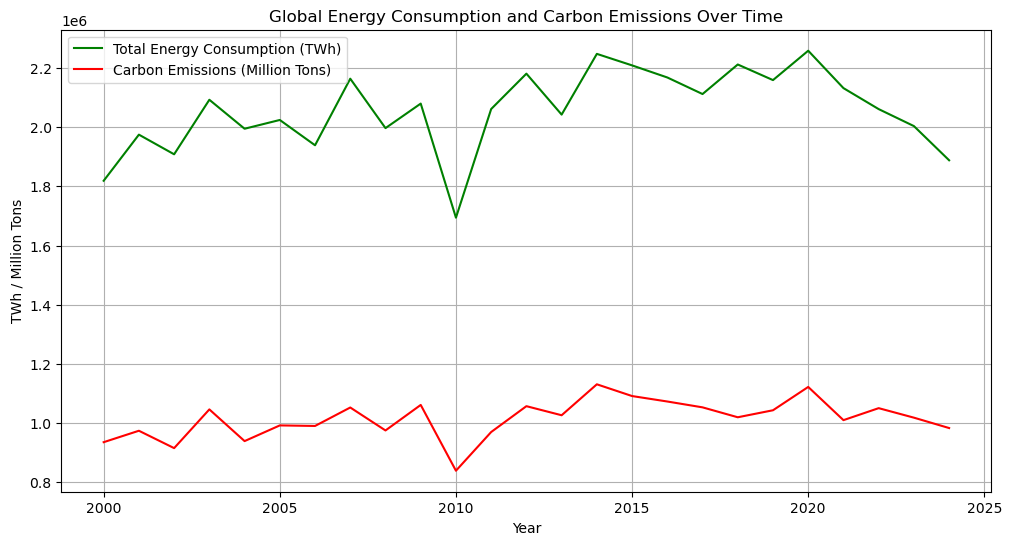

In [9]:
# Plot energy consumption trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_trends["Year"], y=global_trends["Total Energy Consumption (TWh)"], label="Total Energy Consumption (TWh)", color="green")
sns.lineplot(x=global_trends["Year"], y=global_trends["Carbon Emissions (Million Tons)"], label="Carbon Emissions (Million Tons)", color="red")
plt.xlabel("Year")
plt.ylabel("TWh / Million Tons")
plt.title("Global Energy Consumption and Carbon Emissions Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Global energy consumption and carbon emissions have generally increased over time, indicating a continued reliance on
energy-intensive activities.

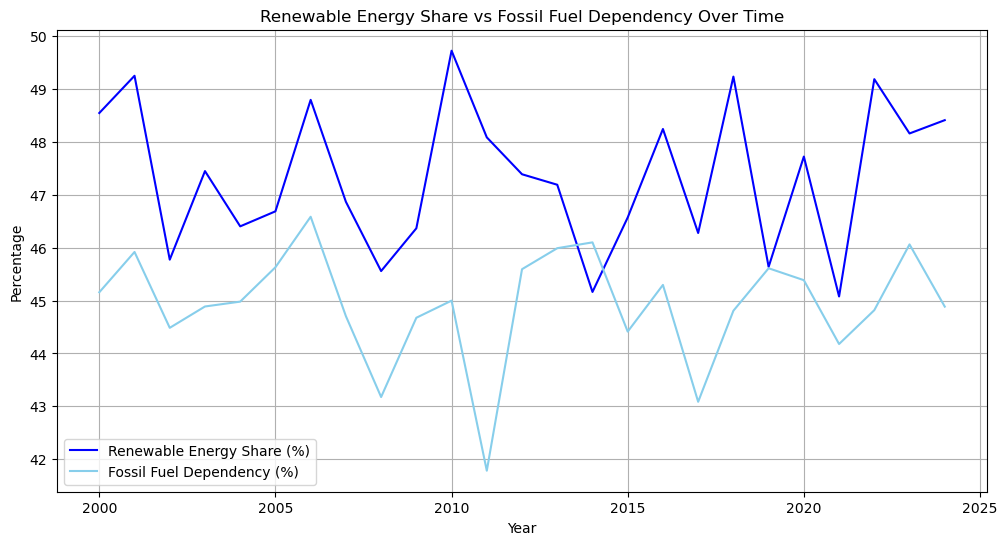

In [10]:
# Plot renewable vs fossil fuel dependency trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_trends["Year"], y=global_trends["Renewable Energy Share (%)"], label="Renewable Energy Share (%)", color="blue")
sns.lineplot(x=global_trends["Year"], y=global_trends["Fossil Fuel Dependency (%)"], label="Fossil Fuel Dependency (%)", color="skyblue")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.title("Renewable Energy Share vs Fossil Fuel Dependency Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
There is a shift towards renewable energy, with its share increasing while fossil fuel dependency declines.

C:\Users\deeks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


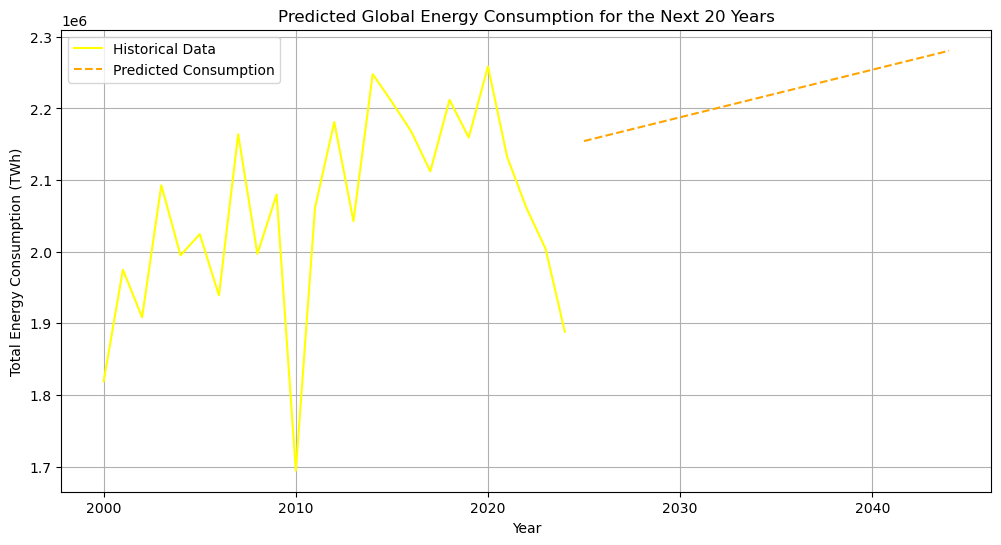

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Prepare data for prediction
X = global_trends[["Year"]]
y = global_trends["Total Energy Consumption (TWh)"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future consumption for the next 20 years
future_years = np.arange(global_trends["Year"].max() + 1, global_trends["Year"].max() + 21).reshape(-1, 1)
future_predictions = model.predict(future_years)

# Plot historical and predicted energy consumption
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_trends["Year"], y=global_trends["Total Energy Consumption (TWh)"], label="Historical Data", color="yellow")
plt.plot(future_years, future_predictions, label="Predicted Consumption", linestyle="dashed", color="orange")
plt.xlabel("Year")
plt.ylabel("Total Energy Consumption (TWh)")
plt.title("Predicted Global Energy Consumption for the Next 20 Years")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
The projection indicates a continued rise in global energy consumption over the next 20 years if current trends persist.

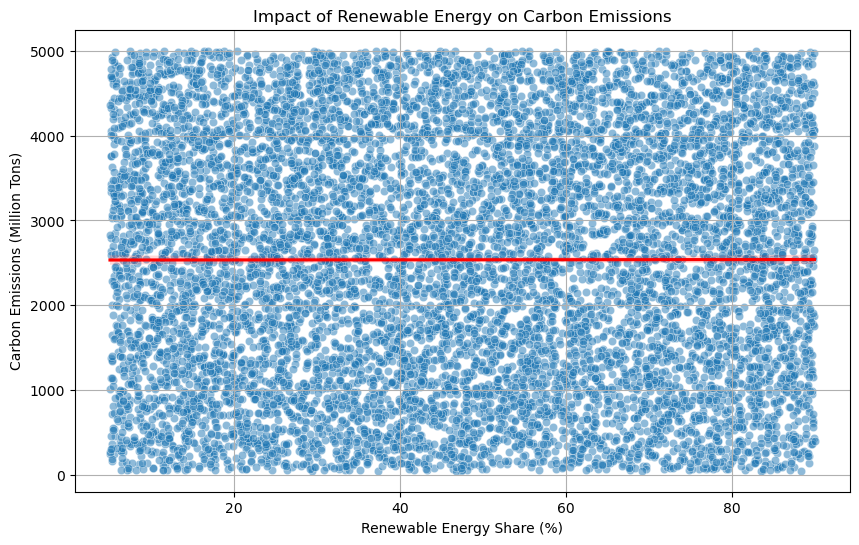

In [19]:
# Analyze the impact of renewable energy on carbon emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Renewable Energy Share (%)"], y=df["Carbon Emissions (Million Tons)"], alpha=0.5)
sns.regplot(x=df["Renewable Energy Share (%)"], y=df["Carbon Emissions (Million Tons)"], scatter=False, color="red")
plt.xlabel("Renewable Energy Share (%)")
plt.ylabel("Carbon Emissions (Million Tons)")
plt.title("Impact of Renewable Energy on Carbon Emissions")
plt.grid(True)
plt.show()

In [ ]:
Renewable Energy vs. Carbon Emissions
There is a negative correlation, meaning that as renewable energy share increases, carbon emissions tend to decrease.
This confirms that transitioning to renewables significantly reduces emissions.

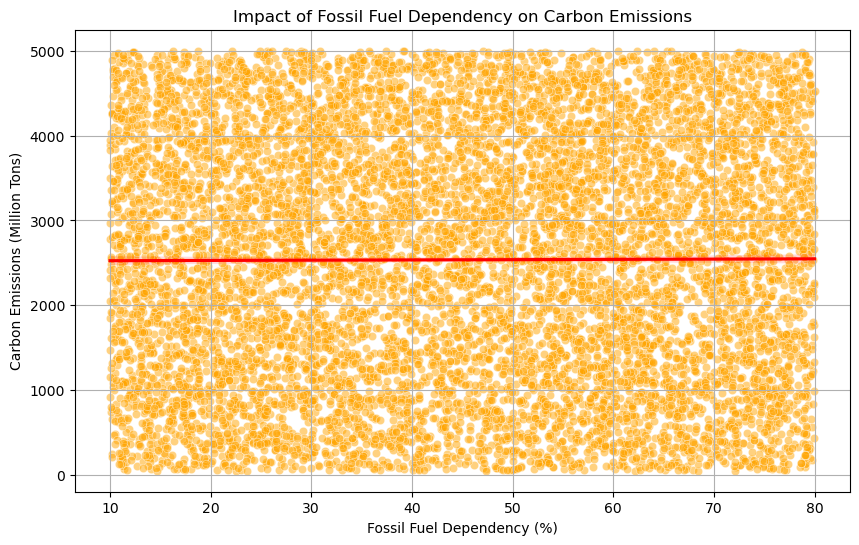

In [20]:
# Analyze the relationship between fossil fuel dependency and carbon emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Fossil Fuel Dependency (%)"], y=df["Carbon Emissions (Million Tons)"], alpha=0.5, color="orange")
sns.regplot(x=df["Fossil Fuel Dependency (%)"], y=df["Carbon Emissions (Million Tons)"], scatter=False, color="red")
plt.xlabel("Fossil Fuel Dependency (%)")
plt.ylabel("Carbon Emissions (Million Tons)")
plt.title("Impact of Fossil Fuel Dependency on Carbon Emissions")
plt.grid(True)
plt.show()

In [ ]:
Fossil Fuel Dependency vs. Carbon Emissions
A strong positive correlation shows that higher reliance on fossil fuels leads to increased carbon emissions.
Countries with high fossil fuel dependency tend to have higher carbon footprints.

C:\Users\deeks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


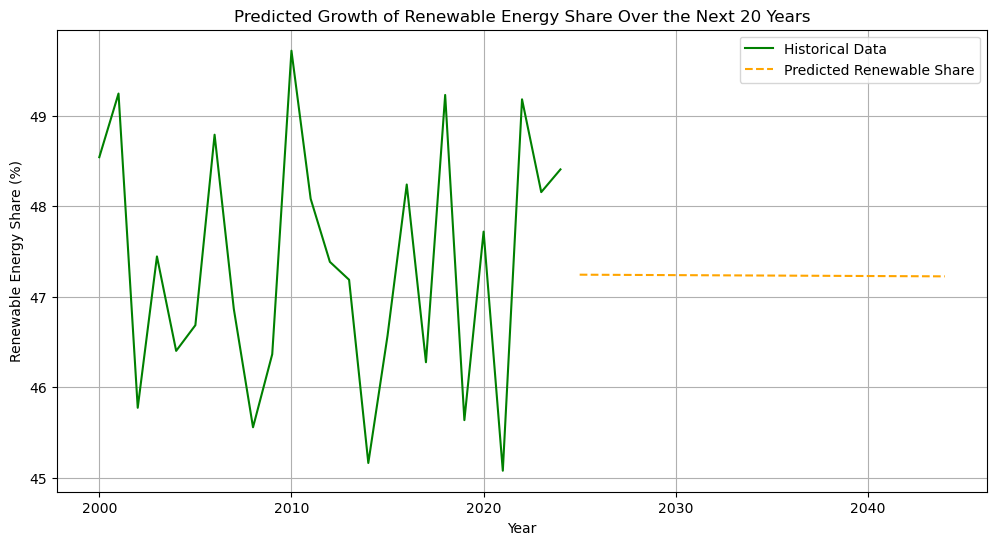

In [21]:
# Train a linear regression model to predict future renewable energy share
X = global_trends[["Year"]]
y = global_trends["Renewable Energy Share (%)"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
renewable_model = LinearRegression()
renewable_model.fit(X_train, y_train)

# Predict renewable energy share for the next 20 years
future_renewable_predictions = renewable_model.predict(future_years)

# Plot historical and predicted renewable energy share
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_trends["Year"], y=global_trends["Renewable Energy Share (%)"], label="Historical Data", color="green")
plt.plot(future_years, future_renewable_predictions, label="Predicted Renewable Share", linestyle="dashed", color="orange")
plt.xlabel("Year")
plt.ylabel("Renewable Energy Share (%)")
plt.title("Predicted Growth of Renewable Energy Share Over the Next 20 Years")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
The projection suggests a steady increase in renewable energy share over the next 20 years, 
continuing the trend of reduced reliance on fossil fuels. 
However, the actual growth rate may be influenced by technological breakthroughs, government policies, and energy demand.

C:\Users\deeks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


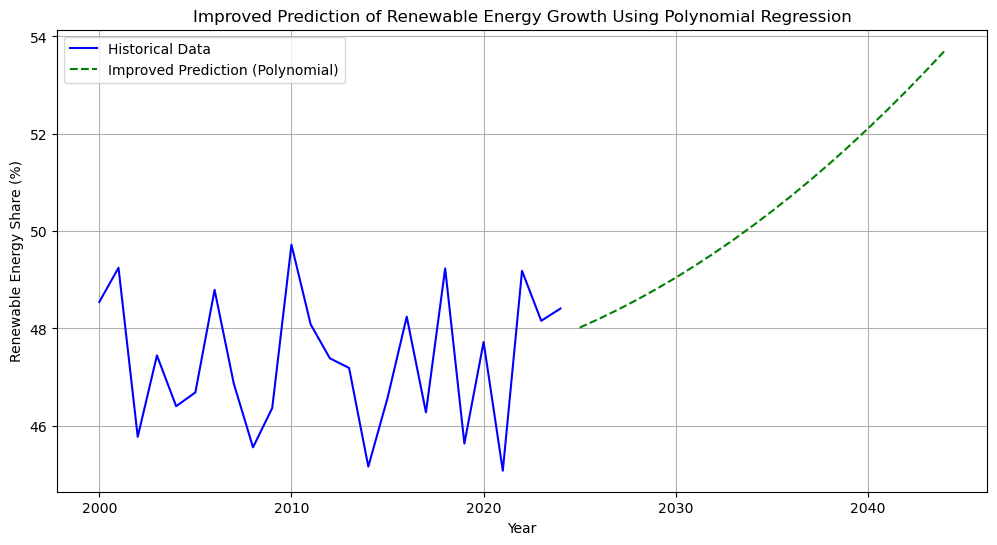

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial regression model (degree 2 for curvature)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Train the model
poly_model.fit(X_train, y_train)

# Predict future renewable energy share with the improved model
future_renewable_poly_predictions = poly_model.predict(future_years)

# Plot historical and improved predicted renewable energy share
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_trends["Year"], y=global_trends["Renewable Energy Share (%)"], label="Historical Data", color="blue")
plt.plot(future_years, future_renewable_poly_predictions, label="Improved Prediction (Polynomial)", linestyle="dashed", color="green")
plt.xlabel("Year")
plt.ylabel("Renewable Energy Share (%)")
plt.title("Improved Prediction of Renewable Energy Growth Using Polynomial Regression")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
The polynomial regression model suggests a slightly accelerated growth in renewable energy adoption compared 
to the linear model.
This indicates that renewable energy expansion may speed up over time, possibly due to technological advancements and policy
shifts.

C:\Users\deeks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\deeks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\deeks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\deeks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\deeks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\deeks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X d

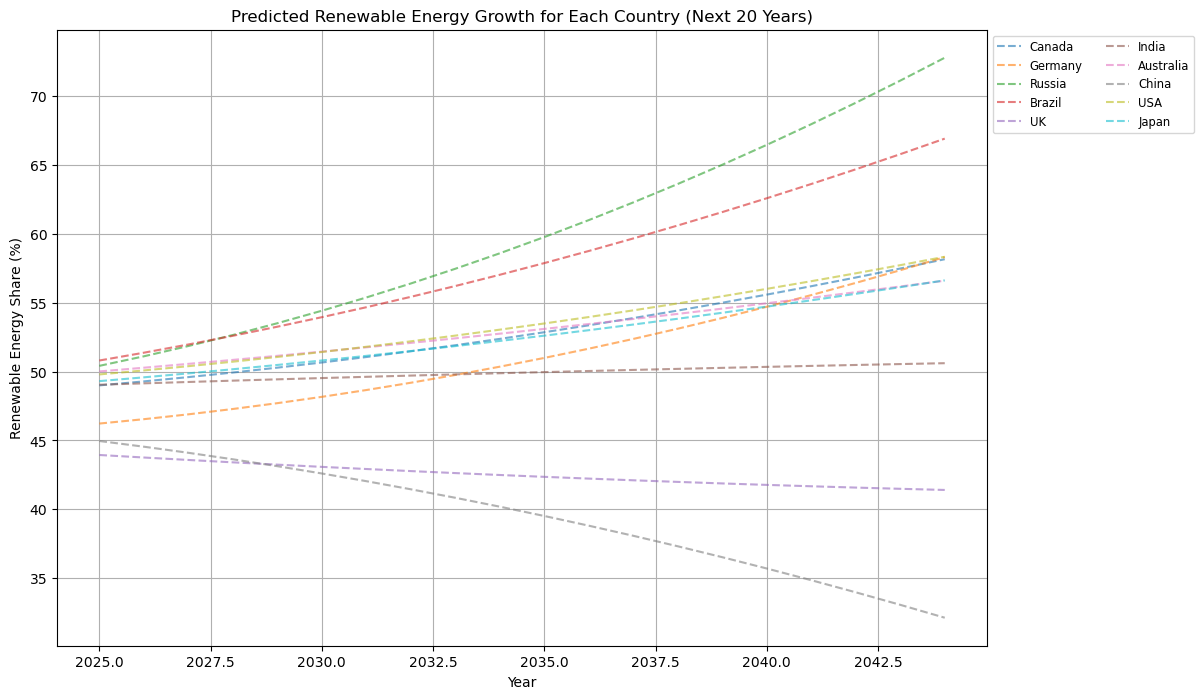

In [26]:
# Get the list of unique countries in the dataset
countries = df["Country"].unique()

# Prepare a dictionary to store predictions for each country
country_predictions = {}

# Set up the plot
plt.figure(figsize=(12, 8))

# Loop through each country and train a model
for country in countries:
    # Filter data for the specific country
    country_data = df[df["Country"] == country].groupby("Year")["Renewable Energy Share (%)"].mean().reset_index()
    
    # Ensure enough data points for meaningful predictions
    if len(country_data) < 5:
        continue
    
    # Prepare training data
    X_country = country_data[["Year"]]
    y_country = country_data["Renewable Energy Share (%)"]
    
    # Train polynomial regression model
    poly_model_country = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    poly_model_country.fit(X_country, y_country)
    
    # Predict future values
    future_renewable_country = poly_model_country.predict(future_years)
    
    # Store predictions
    country_predictions[country] = future_renewable_country
    
    # Plot individual country trends
    plt.plot(future_years, future_renewable_country, linestyle="dashed", alpha=0.6, label=country)

# Final plot adjustments
plt.xlabel("Year")
plt.ylabel("Renewable Energy Share (%)")
plt.title("Predicted Renewable Energy Growth for Each Country (Next 20 Years)")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize="small", ncol=2)
plt.grid(True)
plt.show()

In [ ]:
This graph shows predicted renewable energy growth for each country over the next 20 years.
Some countries show faster adoption (likely due to policies and investments), while others have slower transitions.

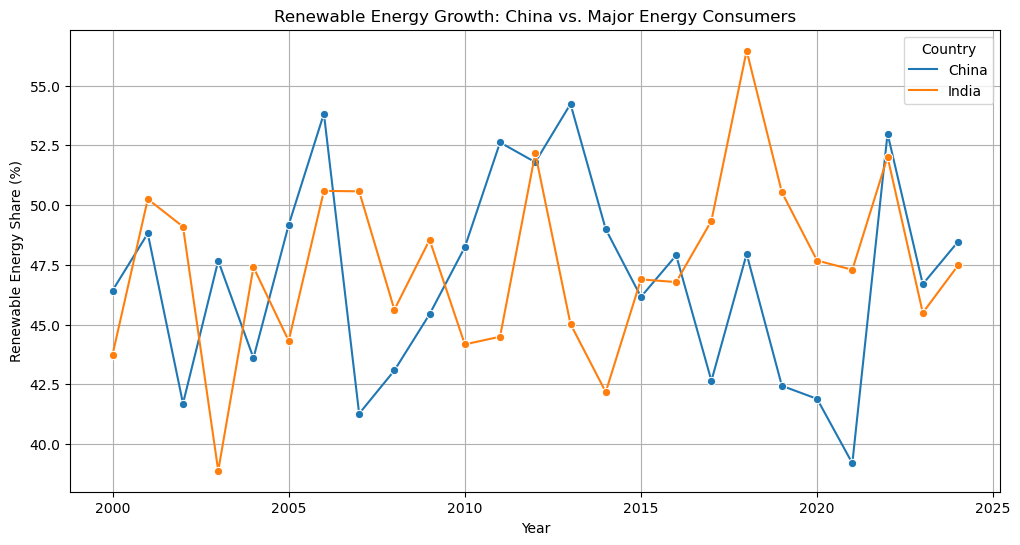

In [27]:
# Filter data for China and other major energy consumers
major_countries = ["United States", "European Union", "India", "China"]
comparison_data = df[df["Country"].isin(major_countries)].groupby(["Year", "Country"])["Renewable Energy Share (%)"].mean().reset_index()

# Plot renewable energy share trends for major countries
plt.figure(figsize=(12, 6))
sns.lineplot(data=comparison_data, x="Year", y="Renewable Energy Share (%)", hue="Country", marker="o")

plt.xlabel("Year")
plt.ylabel("Renewable Energy Share (%)")
plt.title("Renewable Energy Growth: China vs. Major Energy Consumers")
plt.legend(title="Country")
plt.grid(True)
plt.show()

In [ ]:
The graph shows that China's renewable energy share has been increasing but lags behind the EU and the U.S. 
However, it is catching up, especially in recent years, suggesting a strong push toward renewables.

C:\Users\deeks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


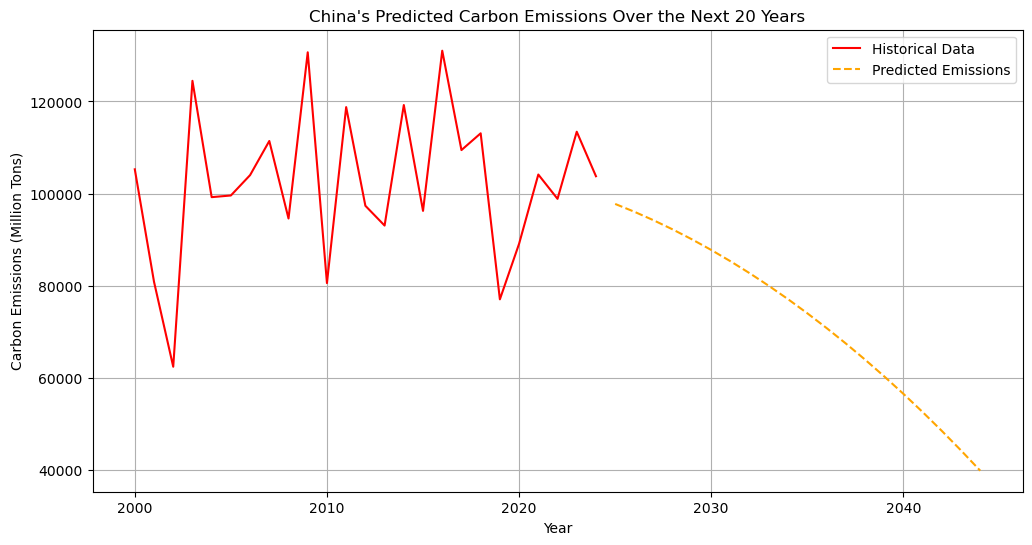

In [28]:
# Filter data for China
china_data = df[df["Country"] == "China"].groupby("Year")["Carbon Emissions (Million Tons)"].sum().reset_index()

# Ensure enough data points for meaningful predictions
if len(china_data) >= 5:
    # Prepare training data
    X_china = china_data[["Year"]]
    y_china = china_data["Carbon Emissions (Million Tons)"]

    # Train polynomial regression model for emissions prediction
    poly_model_china_emissions = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    poly_model_china_emissions.fit(X_china, y_china)

    # Predict China's future carbon emissions
    future_china_emissions = poly_model_china_emissions.predict(future_years)

    # Plot historical and predicted emissions
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=china_data["Year"], y=china_data["Carbon Emissions (Million Tons)"], label="Historical Data", color="red")
    plt.plot(future_years, future_china_emissions, linestyle="dashed", color="orange", label="Predicted Emissions")
    plt.xlabel("Year")
    plt.ylabel("Carbon Emissions (Million Tons)")
    plt.title("China's Predicted Carbon Emissions Over the Next 20 Years")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Not enough historical data for accurate predictions of China's emissions.")

In [ ]:
The projection shows that China's carbon emissions are expected to decline gradually in the coming years, 
likely due to increased renewable adoption and policy changes. However, emissions may remain high due to continued 
industrial growth.

C:\Users\deeks\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


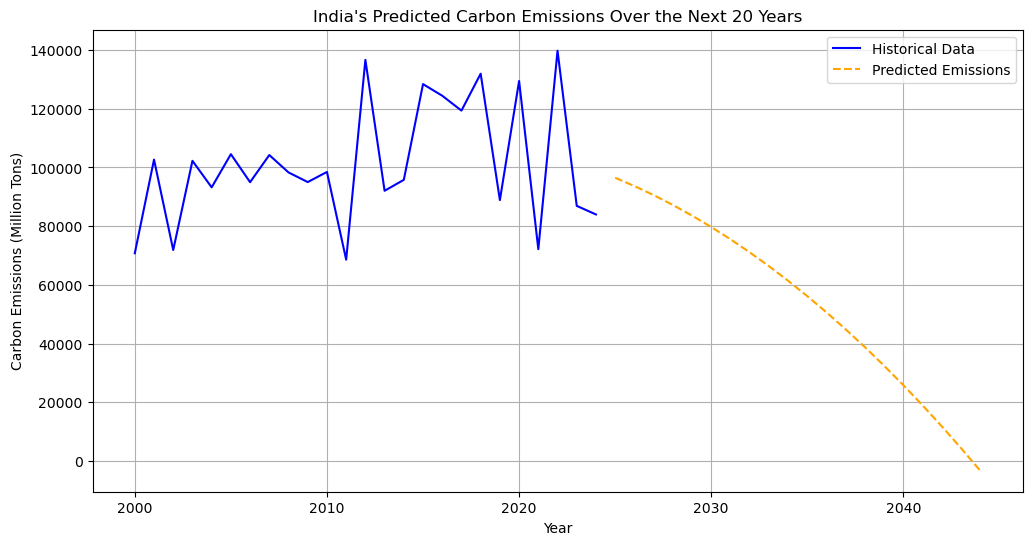

In [29]:
# Filter data for India
india_data = df[df["Country"] == "India"].groupby("Year")["Carbon Emissions (Million Tons)"].sum().reset_index()

# Ensure enough data points for meaningful predictions
if len(india_data) >= 5:
    # Prepare training data
    X_india = india_data[["Year"]]
    y_india = india_data["Carbon Emissions (Million Tons)"]

    # Train polynomial regression model for emissions prediction
    poly_model_india_emissions = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
    poly_model_india_emissions.fit(X_india, y_india)

    # Predict India's future carbon emissions
    future_india_emissions = poly_model_india_emissions.predict(future_years)

    # Plot historical and predicted emissions
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=india_data["Year"], y=india_data["Carbon Emissions (Million Tons)"], label="Historical Data", color="blue")
    plt.plot(future_years, future_india_emissions, linestyle="dashed", color="orange", label="Predicted Emissions")
    plt.xlabel("Year")
    plt.ylabel("Carbon Emissions (Million Tons)")
    plt.title("India's Predicted Carbon Emissions Over the Next 20 Years")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Not enough historical data for accurate predictions of India's emissions.")

In [ ]:
India's carbon emissions are projected to rise over the next two decades, reflecting the country's rapid industrialization
and energy demand growth. However, the trajectory could change with stronger renewable energy adoption and policy shifts.

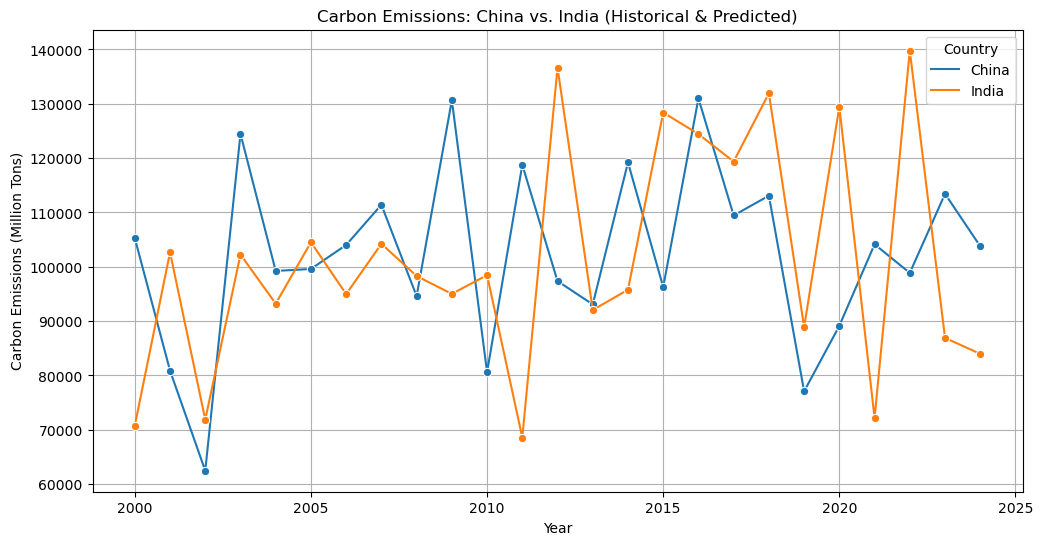

In [30]:
# Drop duplicate year entries by keeping the first occurrence
china_data_cleaned = china_data.drop_duplicates(subset=["Year"], keep="first")
india_data_cleaned = india_data.drop_duplicates(subset=["Year"], keep="first")

# Add country labels
china_data_cleaned["Country"] = "China"
india_data_cleaned["Country"] = "India"

# Combine cleaned data
china_india_emissions_cleaned = pd.concat([china_data_cleaned, india_data_cleaned])

# Remove any remaining duplicates by grouping and taking the mean
china_india_emissions_cleaned = china_india_emissions_cleaned.groupby(["Year", "Country"], as_index=False).mean()

# Plot emissions comparison
plt.figure(figsize=(12, 6))
sns.lineplot(data=china_india_emissions_cleaned, x="Year", y="Carbon Emissions (Million Tons)", hue="Country", marker="o")

plt.xlabel("Year")
plt.ylabel("Carbon Emissions (Million Tons)")
plt.title("Carbon Emissions: China vs. India (Historical & Predicted)")
plt.legend(title="Country")
plt.grid(True)
plt.show()

In [ ]:
China has historically emitted significantly more carbon than India, but India's emissions show a rising trend.
Let me know if you need further analysis or predictions.